# Entscheidungsbäume

Entscheidungsbäume sind von zwei Haupttypen:

-  Klassifikationsbäume: Vorhersage einer diskreten Klasse zu der die Daten gehören
-  Regressionsbäume: Vorhersage einer realen Zahl (z.B. die Lieferzeit).

Die CART-Analyse (CART = Classification And Regression Tree) ist ein Oberbegriff für die beiden oben genannten Verfahren, da die Verfahren einige Ähnlichkeiten aufweisen. Eine Alternative zur Anpassung eines einzelnen Baumes ist die Kombination mehrerer verschiedener Entscheidungsbäume. Diese Methoden werden Ensemble-Methoden genannt. Diese kombinierten Modelle führen zu einer höheren Vorhersagequalität, sind aber schwieriger zu interpretieren. Zwei Ansätze zur Kombination mehrerer Bäume sind bagging und boosting. 

In [8]:
# Importieren der Pakete
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import pip
#pip.main(['install', 'xgboost']) # Installation von Paketen, die nicht bereits installiert sind
# Für die Installation müssen sie einmalig das # vor dem pip.main entfernen
import xgboost as xgb # Danach kann man es dann importierne
from sklearn.metrics import mean_squared_error

# Setzen eines seeds für die folgenden Methoden (Reproduzierbarkeit)
np.random.seed(11)

## Regressionsbäume

In [9]:
# Laden des Datensatzs
auto = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\auto.csv")
print(auto.shape)
auto.head() # Der letzte Befehl in einem Jupyter Notebook muss nicht explizit geprintet werden um angezeigt zu werden


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
#mpg = Miles per gallon

auto = auto[auto.horsepower != '?'] #Entfernen der Zeilen mit fehlenden Werten, hier als ? codiert
print(auto.horsepower.dtype)

auto.horsepower = auto.horsepower.astype("int")
auto.shape

object


(392, 9)

In [11]:
# Definieren von X und y
X = auto.drop(['mpg', 'car name'], axis=1) # Alle anderen Spalten ausser mpg und car name
# Regressionsbaeume funktionieren nicht mit kategoriellen Variablen dieser Art (car name), 
# entweder man muss sie codieren oder lässt sie außenvor
Y = auto['mpg']


# Aufteilen der Daten so, dass zufaellig 20% der Daten fuer die Testdaten zurück gelegt werden
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state = 123) 

In [12]:
# Zwei Regressoren mit verschiedener Tiefe
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

# Die Modelle anpassen
reg1 = regr_1.fit(X_train, Y_train)
reg2 = regr_2.fit(X_train, Y_train)


[Text(167.4, 181.2, 'displacement <= 185.5\nmse = 60.74\nsamples = 313\nvalue = 23.622'),
 Text(83.7, 108.72, 'horsepower <= 70.5\nmse = 32.594\nsamples = 178\nvalue = 28.983'),
 Text(41.85, 36.23999999999998, 'mse = 25.407\nsamples = 61\nvalue = 33.479'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 20.311\nsamples = 117\nvalue = 26.639'),
 Text(251.10000000000002, 108.72, 'horsepower <= 127.0\nmse = 9.998\nsamples = 135\nvalue = 16.554'),
 Text(209.25, 36.23999999999998, 'mse = 5.341\nsamples = 61\nvalue = 19.034'),
 Text(292.95, 36.23999999999998, 'mse = 4.585\nsamples = 74\nvalue = 14.509')]

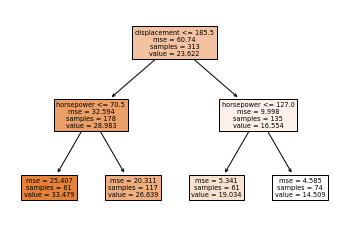

In [13]:
# Den Baum graphisch darstellen
tree.plot_tree(reg1, feature_names=X_train.columns,
                   filled=True)

In [14]:
# Die Bäume zur eigentlichen Vorhersage verwenden
pred1 = regr_1.predict(X_test)
pred2 = regr_2.predict(X_test)

In [15]:
# Bestimmen Sie den MSE
mse1 = mean_squared_error(Y_test, pred1)
print("MSE: %f" % (mse1))

MSE: 22.697284


In [16]:
mse2 = mean_squared_error(Y_test, pred2)
print("MSE: %f" % (mse2))

MSE: 11.294982


Der Datensatz stammt von https://archive.ics.uci.edu/ml/datasets/Auto+MPG

------------
## Aufgabe

Passen sie einen Baum der Tiefe 7 an. Verbessert sich die Vorhersage? Wählen sie zufällig eine Beobachtung aus dem Testdatensatz aus und sagen sie die mpg mittels jedes der 3 Modelle vorher. Wie unterscheiden sich die Vorhersagen der 3 Modelle?

In [17]:
# Hier kann Ihre Lösung stehen

--------
## Klassifikationsbäume

In [18]:
# Laden der Daten
wine = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\wine.csv")
print(wine.shape)
wine.head()

# Der Datensatz stammt von https://gist.github.com/tijptjik/9408623

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
# Definieren von X und y
X = wine.loc[:, wine.columns != 'Wine'] # Alle anderen Spalten ausser Wine
Y = wine['Wine']

# Aufteilen der Daten so, dass zufaellig 20% der Daten fuer die Testdaten zurück gelegt werden
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state = 123) 

In [20]:
# Zwei Classifier mit verschiedener Tiefe
class_1 = DecisionTreeClassifier(max_depth = 2)
class_2 = DecisionTreeClassifier(max_depth = 5)

# Die Modelle anpassen
clf1 = class_1.fit(X_train, Y_train)
clf2 = class_2.fit(X_train, Y_train)

[Text(167.4, 181.2, 'Proline <= 755.0\ngini = 0.645\nsamples = 142\nvalue = [51, 60, 31]\nclass = Wine 2'),
 Text(83.7, 108.72, 'OD <= 2.09\ngini = 0.462\nsamples = 86\nvalue = [2, 57, 27]\nclass = Wine 2'),
 Text(41.85, 36.23999999999998, 'gini = 0.271\nsamples = 31\nvalue = [0, 5, 26]\nclass = Wine 3'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.104\nsamples = 55\nvalue = [2, 52, 1]\nclass = Wine 2'),
 Text(251.10000000000002, 108.72, 'Flavanoids <= 2.165\ngini = 0.226\nsamples = 56\nvalue = [49, 3, 4]\nclass = Wine 1'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Wine 3'),
 Text(292.95, 36.23999999999998, 'gini = 0.039\nsamples = 50\nvalue = [49, 1, 0]\nclass = Wine 1')]

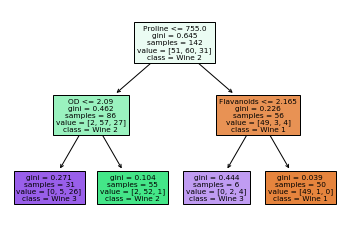

In [21]:
# Den Baum graphisch darstellen
tree.plot_tree(clf1, feature_names=X_train.columns,
                   class_names=["Wine 1", "Wine 2", "Wine 3"],
                   filled=True)

[Text(189.42631578947368, 199.32, 'Proline <= 755.0\ngini = 0.645\nsamples = 142\nvalue = [51, 60, 31]\nclass = Wine 2'),
 Text(114.53684210526316, 163.07999999999998, 'OD <= 2.09\ngini = 0.462\nsamples = 86\nvalue = [2, 57, 27]\nclass = Wine 2'),
 Text(70.48421052631579, 126.83999999999999, 'Malic.acid <= 1.605\ngini = 0.271\nsamples = 31\nvalue = [0, 5, 26]\nclass = Wine 3'),
 Text(35.242105263157896, 90.6, 'Nonflavanoid.phenols <= 0.245\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Wine 2'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Wine 3'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Wine 2'),
 Text(105.72631578947369, 90.6, 'Flavanoids <= 1.58\ngini = 0.074\nsamples = 26\nvalue = [0, 1, 25]\nclass = Wine 3'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]\nclass = Wine 3'),
 Text(123.34736842105264, 54.359999999999985,

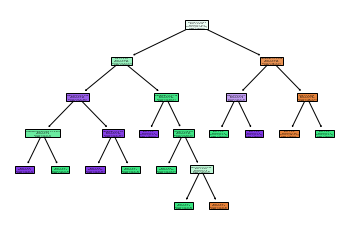

In [22]:
tree.plot_tree(clf2, feature_names=X_train.columns,
                   class_names=["Wine 1", "Wine 2", "Wine 3"],
                   filled=True)

In [23]:
# Die Bäume zur eigentlichen Vorhersage verwenden
pred1 = class_1.predict(X_test)
pred2 = class_2.predict(X_test)

In [24]:
# Bestimme die accuracy 
accuracy1 = sklearn.metrics.accuracy_score(pred1,Y_test)
print("The accuracy of the tree with depth 2: ", '%.2f'% (accuracy1*100),"%")

The accuracy of the tree with depth 3:  88.89 %


In [25]:
accuracy2 = sklearn.metrics.accuracy_score(pred2,Y_test)
print("The accuracy of the tree with depth 5: ", '%.2f'% (accuracy2*100),"%")

The accuracy of the tree with depth 5:  91.67 %


Zusätzlich können wir die accuracy hinsichtlich der Kreuzvalidierung betrachten. Dies hat den Vorteil, dass wir gleichzeitig verschiedene Test- und Trainingsdatensätze erzeugen, sodass die Genauigkeit weniger von der Wahl des seeds, also dem Zufall abhängt.

In [26]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(class_1, X_test, Y_test, cv=6)
print("The corssvalidated accuracy of the tree with depth 2: %0.2f (+/- %0.2f)" % (scores1.mean()*100, scores1.std() * 200), "%")

The corssvalidated accuracy of the tree with depth 3: 83.33 (+/- 50.92) %


In [27]:
scores2 = cross_val_score(class_2, X_test, Y_test, cv=6)
print("The corssvalidated accuracy of the tree with depth 5: %0.2f (+/- %0.2f)" % (scores2.mean()*100, scores2.std() * 200),"%")

The corssvalidated accuracy of the tree with depth 5: 88.89 (+/- 31.43) %


---------
## Aufgabe
In der Vorlesung haben sie gesehen, dass Accuracy kein gutes Maß für die Qualität eines Modelles ist, wenn die Gruppengrößen sehr ungleich sind. Überprüfen sie, wie sich die Gruppengrößen für diese Daten verhalten. Was könnten sie tun, falls die Gruppengrößen sehr unterschiedlich sind?

Wenn wir die Accuracy mittels Kreuzvalidierung betrachten haben wir auch Intervalle angegeben, warum könnte die Accuracy so großen Schwankungen unterliegen?

In [28]:
# Hier kann Ihre Lösung stehen

--------------
# Random Forest
Random forest ist eine Ensemble-Lernmethode für Klassifikations- und Regressionsmodelle. Dabei werden mehrere Entscheidungsbäume konstruiert, welche dann kombiniert werden um die Qualität der Entscheidung zu verbessern. Die einzelnen Bäume werden nach einem Zufallsprinzip unkorreliert erstellt. Jeder dieser Bäum trifft wie im Beispiel zuvor individuelle Entscheidungen. Diese werden dann zu einer globalen Entscheidung zusammengefasst. Die Kombination der einzelnen Bäume beruht auf dem sogenannten Bagging, die Entscheidungen der einzelnen Bäume gehen also mit einer vorgegebenen Gewichtung ein.

In [29]:
# Importiere die RF Funktion
from sklearn.ensemble import RandomForestClassifier#

In [30]:
# Wir verwenden den gleichen Datensatz wie zuvor, mal sehen, ob wir die accuracy noch weiter verbessern können
class_rf = RandomForestClassifier(n_estimators = 100, # Die Anzahl Bäume für einen Wald
                                  max_depth=3, # Maximale Tiefe jedes Baumes
                                  criterion = "gini", # Funktion zur Beurteilung der Qualität eines Splits
                                  max_features="auto" # Das bedeutet die Anzahl Features die für 
                                                      # einen Split berücksichtigt wird ist sqrt(n_features)
                                 ) 

class_rf.fit(X_train,Y_train)
pred_rf = class_rf.predict(X_test)

In [31]:
accuracy_rf = sklearn.metrics.accuracy_score(pred_rf,Y_test)
print("The accuracy of the random forest approach: ", '%.2f'% (accuracy_rf*100),"%")

The accuracy of the random forest approach:  100.00 %


Mit einer Accuracy von 100% scheint unser Modell hier perfekte Vorhersagen zu treffen. Das kommt sehr selten vor. Sollte ihr Klassifikationsmodell eine Accuracy im Bereich von 90% haben handelt es sich bereits um ein sehr gutes Modell.

------------------
## Aufgabe
Nachdem sie für die Daten bereits betrachtet haben ob die Gruppenaufteilung gleichmäßig ist, finden sie für die Funktion RandomForestClassifier eine Einstellung, die es ermöglicht den Algorithmus daran anzupassen? https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [32]:
# Hier kann Ihre Lösung stehen

--------------------
# XGBoost
XGBoost basiert wie die anderen Methoden dieses Abschnitts auch auf einem Entscheidungsbaum. Da es sich um den Zusammenschluss mehrere Bäume handelt gehört auch XGBoost zu den Ensemble-Algorithmen für maschinelles Lernen. Der Name XGBoost ist von den Begriffen e**X**treme **G**radient **Boost**ing abgeleitet. Bei Vorhersageproblemen mit unstrukturierten Daten (Bilder, Text usw.) performen neuronale Netze oft am besten. Im Falle kleinerer und strukturierter Datensätze sind die baumbasierten Ansätze oft performanter. Einer der kritischen Punkte bei der Verwendung von XGBoost ist die Wahl der Hyperparameter hier eine kleine Auswahl der wichtigsten im Paket xgboost in Python:

- *objective*: Definiert das Lernziel (default = reg:squarederror)
- *learning_rate*: Lernrate (default = 0.3)
- *max_depth*: Maximale Tiefe der Bäume (default = 6)
- *n_estimator*: Anzahl Bäume (default = 100) 

In [39]:
X = auto.drop(['mpg', 'car name'], axis=1) # Alle anderen Spalten ausser mpg und car name
# Regressionsbaeume funktionieren nicht mit kategoriellen Variablen dieser Art, 
# entweder man muss sie codieren oder lässt sie außenvor
Y = auto['mpg']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=234)

In [44]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 10)

In [45]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

MSE: 103.732598


Der MSE des XGBoost Modells zeigt, dass eine komplizierte Methode nicht unbedingt zu besseren Ergebnissen führen muss. Komplexere Methoden bieten auch mehr Spielraum für eine nicht so gute Wahl der Hyperparameter. Deshalb ist es sinnvoll auch Hyperparameter sinnvoll zu tunen. Hier wäre es zum Beispiel möglich gesewen 

---------------
## Aufgaben

Versuchen sie durch Hyperparametertuning oder die Verwendung anderer Parameter den MSE des XGBRegressors zu verbessern. Informationen zu der Funktion und den möglichen Parametern finden sie unter:
https://xgboost.readthedocs.io/en/latest/parameter.html

In [38]:
# Hier kann Ihre Lösung stehen